In [200]:
#Fetal health classification dataset from Kaggle.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from sklearn.dummy import DummyClassifier

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [312]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [284]:
fetalHealthData    = pd.read_csv(r'E:\Data\fetal_data\fetal_health.csv')
df = fetalHealthData

In [204]:
print(df.shape)
df.info()
#No missing data in the dataset.

(2126, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_va

In [285]:
# summarize the shape of the dataset
print(df.shape)
# summarize the class distribution
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(2126, 22)
Class=2, Count=295, Percentage=13.876%
Class=1, Count=1655, Percentage=77.846%
Class=3, Count=176, Percentage=8.278%


In [286]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [287]:
df.skew().sort_values(ascending=False)

severe_decelerations                                      17.353457
fetal_movement                                             7.811477
prolongued_decelerations                                   4.323965
histogram_number_of_zeroes                                 3.920287
histogram_variance                                         3.219974
percentage_of_time_with_abnormal_long_term_variability     2.195075
fetal_health                                               1.849934
light_decelerations                                        1.718437
mean_value_of_short_term_variability                       1.657339
mean_value_of_long_term_variability                        1.331998
accelerations                                              1.204392
histogram_number_of_peaks                                  0.892886
histogram_max                                              0.577862
histogram_width                                            0.314235
uterine_contractions                            

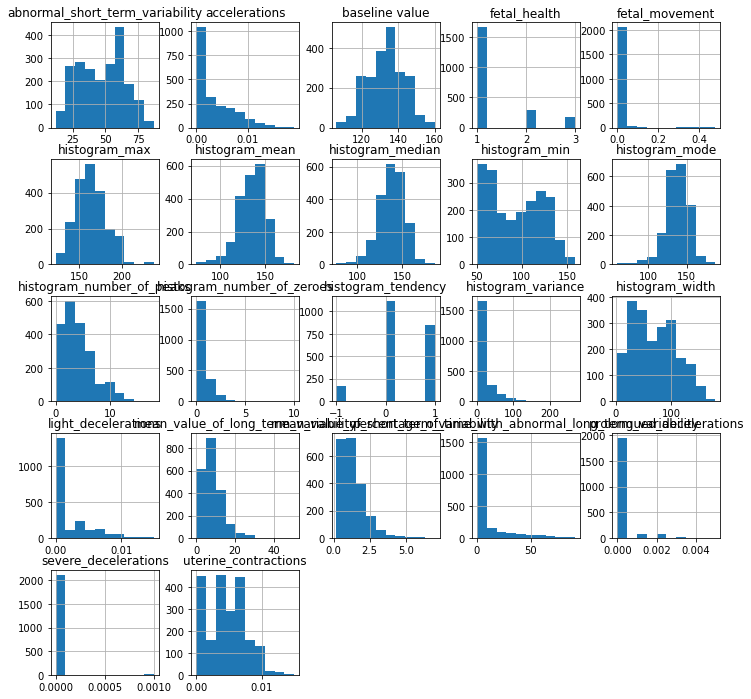

In [208]:
_ = df.hist(grid = True, figsize = (12,12))

In [288]:
y = df['fetal_health']

In [290]:
X = df.copy()
X.drop('fetal_health',axis = 'columns', inplace = True)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

>Uniform 0.335 (0.031)
>Stratified 0.632 (0.032)
>Majority 0.778 (0.004)
>Minority 0.778 (0.004)
>Prior 0.778 (0.004)


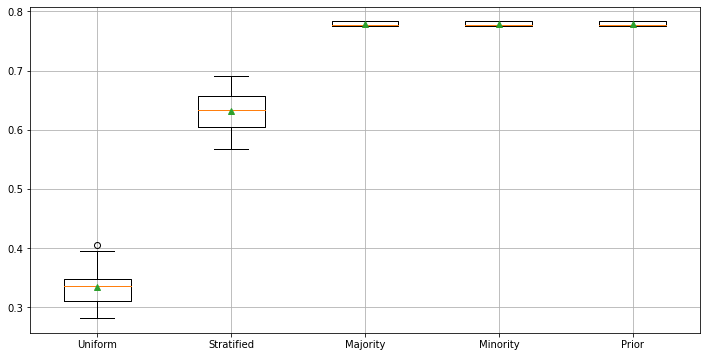

In [292]:
# evaluate a model
def evaluate_model(X_train, y_train, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define models to test
def get_models():
    models, names = list(), list()
    # Uniformly Random Guess
    models.append(DummyClassifier(strategy='uniform'))
    names.append('Uniform')
    # Prior Random Guess
    models.append(DummyClassifier(strategy='stratified'))
    names.append('Stratified')
    # Majority Class: Predict 0
    models.append(DummyClassifier(strategy='most_frequent'))
    names.append('Majority')
    # Minority Class: Predict 1
    models.append(DummyClassifier(strategy='constant', constant=1))
    names.append('Minority')
    # Class Prior
    models.append(DummyClassifier(strategy='prior'))
    names.append('Prior')
    return models, names

# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
    # evaluate the model and store results
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    # summarize and store
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))
# plot the results
plt.figure(figsize= (12,6))
plt.boxplot(results, labels=names, showmeans=True)
plt.grid()
plt.show()

In [293]:
def get_models():
    models, names = list(), list()
    # SVM
    models.append(SVC(gamma='auto'))
    names.append('SVM')
    # KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    # Bagging
    models.append(BaggingClassifier(n_estimators=1000))
    names.append('BAG')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    # ET
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    #XBOOST
    models.append(XGBClassifier())
    names.append('XGB')
    
    return models, names

In [294]:
# define models
models, names = get_models()
results = list()
# evaluate each model
for i in range(len(models)):
# evaluate the model and store results
    scores = evaluate_model(X_train, y_train, models[i])
    results.append(scores)
    # summarize performance
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

>SVM 0.792 (0.008)
>KNN 0.888 (0.017)
>BAG 0.930 (0.018)
>RF 0.933 (0.015)
>ET 0.925 (0.014)
>XGB 0.946 (0.015)


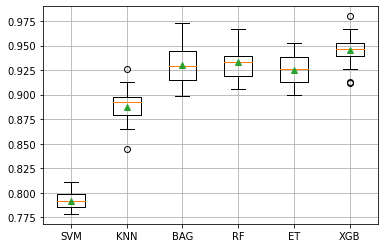

In [295]:
# plot the results
plt.boxplot(results, labels=names, showmeans=True)
plt.grid()
plt.show()

In [296]:
#For XGB

In [297]:
model = XGBClassifier(scale_pos_weight=100)
model.fit(X_train,y_train)
y_pred_proba= model.predict_proba(X_test)
y_pred= model.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
y_pred_proba =model.predict_proba(X_test)
roc_value =roc_auc_score(y_test,y_pred_proba, multi_class='ovr',average ='weighted')
print('Area under the ROC Curve for XGB: {} '.format(roc_value))
print('F1 score for XBG: {} '.format(f1_score(y_test, y_pred, average='weighted')))

Area under the ROC Curve for XGB: 0.9765501316710566 
F1 score for XBG: 0.9422087094410575 


In [298]:
model = DummyClassifier(strategy='prior')
model.fit(X_train,y_train)
y_pred= model.predict(X_test)
print('F1 score for DummyClassifier: {} '.format(f1_score(y_test, y_pred, average='weighted')))
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
y_pred_proba =model.predict_proba(X_test)
roc_value =roc_auc_score(y_test,y_pred_proba, multi_class='ovr',average ='weighted')
print('Area under the ROC Curve for DummyClassifier: {} '.format(roc_value))

F1 score for DummyClassifier: 0.675797822258161 
Area under the ROC Curve for DummyClassifier: 0.5 


In [308]:
corr_matrix = df.corr()
print(corr_matrix['fetal_health'].sort_values(ascending=False))

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [309]:
x = df[corr[abs(corr['fetal_health']) > 0.1]['fetal_health'].index]

In [310]:
x.head()

,baseline value,accelerations,uterine_contractions,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.006,0.0,0.0,17.0,2.1,0.0,10.4,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.008,0.0,0.0,16.0,2.1,0.0,13.4,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.008,0.0,0.0,16.0,2.4,0.0,23.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.008,0.0,0.0,16.0,2.4,0.0,19.9,137.0,136.0,138.0,11.0,1.0,1.0


XBoost Classifier Success Rate : 76.53%


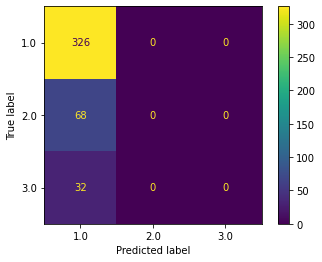

In [320]:
model=DummyClassifier(strategy='prior')
model.fit(x_train,y_train)
x_predict=model.predict(x_test)
s2=accuracy_score(y_test,x_predict)
print("XBoost Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

Linear Regression Success Rate : 99.77%


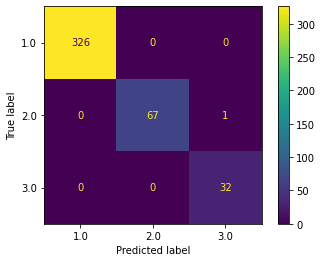

In [319]:
et=ExtraTreesClassifier(n_estimators=1000)
et.fit(x_train,y_train)
x_predict=et.predict(x_test)
s1=accuracy_score(y_test,x_predict)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(et, x_test, y_test)
plt.show()

XBoost Classifier Success Rate : 100.00%


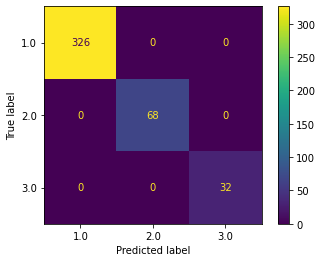

In [317]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
x_predict=xgb.predict(x_test)
s2=accuracy_score(y_test,x_predict)
print("XBoost Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(xgb, x_test, y_test)
plt.show()